# Advanced Classification Predict

© Explore Data Science Academy

---

 **Team JS6**

## Predict Overview: Climate Change Belief Analysis 2022

#### Climate Change
Climate change refers to long-term shifts in temperatures and weather patterns.


Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, Our Company has been challenged with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.


-  analyse the supplied data;
-  identify potential errors in the data and clean the existing data set;
-  determine if additional features can be added to enrich the data set;
-  build a model that is capable of forecasting the three hourly demand shortfalls;
-  evaluate the accuracy of the best machine learning model;
-  perform the feature selection for most important features in the model’s prediction decision, and
-  explain the inner working of the model to a non-technical audience.

## Problem Statement


In this project we determine how people perceive climate change and whether or not a person believes in climate change. This will be done by Building a Natural Language Processing model which will classify whether or not a person believes in climate change, based on their novel tweet data. The Sentiment of tweet, which will be referred to as the target variable, will be modelled as a function of Tweet bodies from massage.


###  **Data Description**

>    The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes
Class Description 

 **Class Description**

- 2 News: the tweet links to factual news about climate change 

- 1 Pro: the tweet supports the belief of man-made climate change 

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change 

- -1 Anti: the tweet does not believe in man-made climate change

**Variable definitions:**

- ***sentiment***: Sentiment of tweet

- ***message***: Tweet body

- ***tweetid***: Twitter unique id

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

In [118]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="unhaHlqXG0AAdHTY3sauuP0Fx",
    project_name="js6-predict",
    workspace="andy-sumo",
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\f5471184\\OneDrive - FRG\\Downloads\\Advanced-Classification-Notebook-main (1)\\Advanced-Classification-Notebook-main' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/andy-sumo/js6-predict/616fddbf31ad496991bc84940d10b866



 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. First we need to load the libraries we are going to use throughout our notebook. After which we will load our train and test data under loading data.|

---

In [2]:
#!pip install WordCloud

import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import MultiIndex

from plotly import graph_objects as go
# set plot style
sns.set()

#Regular Expression used for data cleaning
import re

#Text processing packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

#Model evaluation packages
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, precision_score,  recall_score

#Packages to split the data for testing and training
from sklearn.model_selection import train_test_split

#Packages for features selection
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Modelling Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

#Imbalanced data processing packages
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTEENN, SMOTETomek
from reportlab.lib.styles import getSampleStyleSheet

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier

styles = getSampleStyleSheet()



import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we load the data from the `train csv` file into a DataFrame for Train Data and `test_with_no_labels` file into a DataFrame for Test Data. We will be using Pandas python package to read the csv file from our local computer. We will assign our Train data to name Train and Test Data to Test. |

---

In [3]:
#Load the tweet dataset into a dataframe
train = pd.read_csv("train.csv")
test = pd.read_csv("test_with_no_labels.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

⚡ Description: Exploratory data analysis ⚡ |
:--------------------------- |
In this section, we are required to perform an in-depth analysis of all the variables in the DataFrame. |
we first begin with the vital component which is the EDA, to better understand the dataset we are working with and to gain insight about the features and labels by performing Univariate or Multivariate , Non-graphical or Graphical Analysis"




In [4]:
# Loading and displaying an overview of the data
print('Dimension of train is: ', train.shape)
print('Dimension of test is: ', test.shape)

Dimension of train is:  (15819, 3)
Dimension of test is:  (10546, 2)


 Our Data Consists of :
* 3 columns and 15819 rows for the Train Data.
* 2 columns and 10546 for the Test Data.

In [5]:
#The first ten rows of the traing dataset
train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


After taking a look at the frist ten rows of the dataframe we can see that we have `Three (3)` columns in the dataFrame The  test dataFrame contains only the features.

We have two features and one label
features inludes:

    - message
    - tweetid

label:

    - sentiment

Now let's take a look at the data types in the dataframe using `pd.info()` to get more information about the dataframe

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


looking at the above output we can see that we have two `int64` and one `object` 

In [7]:
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [8]:
# look at data statistics
train.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

In [9]:
#checking null values in the training data
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Our training data shows that we have **0** null values meaning it is Complete, which means we don't have any missing values.

In [10]:
#checking for unique values sentiment
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Now we look on our label `sentiment`
We have 4 unique values in the label.

Based on the description of the data, here is what each value stands for:

     1 : Pro - The tweet supports the belief of man-made climate change
     2 : News - The tweet links to factual news about climate change
     0 : Neutral - The tweet neither supports nor refutes the belief of man-made climate change
    -1 : Anti - The tweet does not believe in man-made climate change

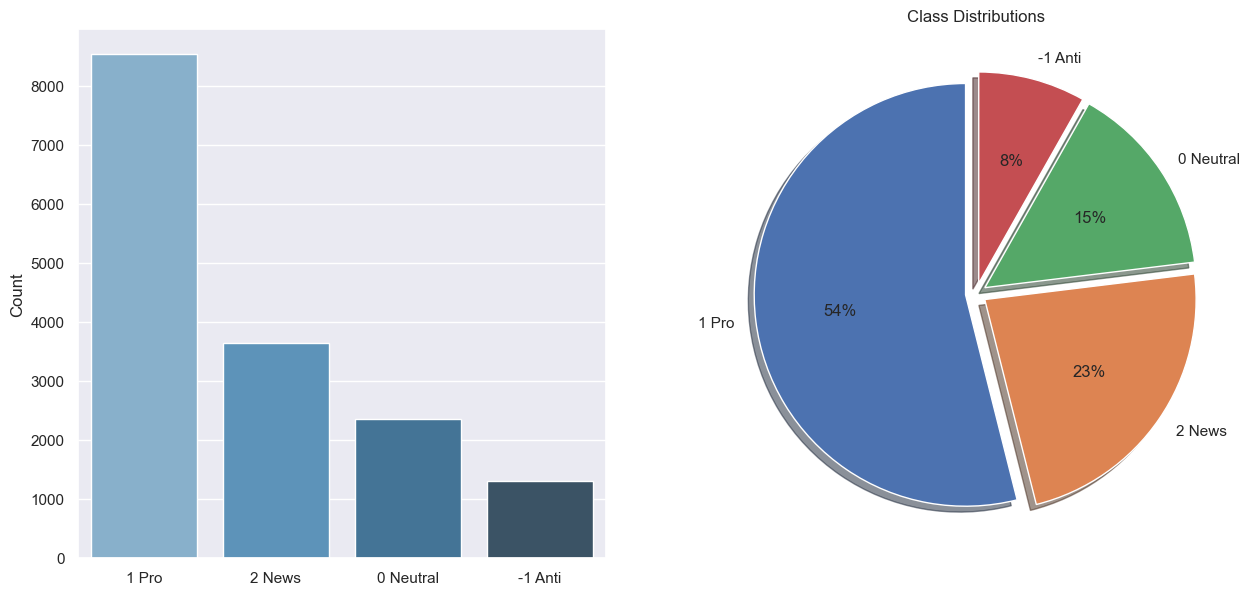

In [11]:
# Display target distribution
fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(15, 7), 
                         dpi=100)

#sns.countplot(train['sentiment'], ax=axes[0])


# Create class distribution dataframe
class_dist = pd.DataFrame(list(train['sentiment'].value_counts()),
                          index=['1 Pro', '2 News', '0 Neutral', '-1 Anti'],
                          columns=['Count'])
# Plot class distribution
sns.set(style="whitegrid")
sns.barplot(x=class_dist.index, y=class_dist.Count, 
           palette="Blues_d",ax=axes[0] )
plt.title('Class Distributions')



labels=['1 Pro', '2 News', '0 Neutral', '-1 Anti'] 

axes[1].pie(train['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=80,
            startangle=90,
            explode = (0.05, 0.05, 0.05, 0.05),)

fig.show()

**Interpretation**

The above plot comfirms that about:

`1296` Anti: tweets do not believe in man-made climate change `-1`

`2353` Neutral: tweets neither supports nor refutes the belief of man-made climate change `0`

`8530` Pro: the tweet supports the belief of man-made climate change `1`

`3640` News: the tweet links to factual news about climate change `2`

The plot shows that the highest proportion of the tweets supports the belief of man-made climate change

**Note:** here the label data appears to be `unbalanced` and it's important to have a balanced label distribution to get a better performing model.

In [12]:
## see statistics for non- numerical features
print("Stats for non- numerical columns : ")
train.groupby('sentiment').describe(include=['object'])

Stats for non- numerical columns : 


message                                                            \
            count unique                                                top   
sentiment                                                                     
-1           1296   1222  RT @realDonaldTrump: The concept of global war...   
 0           2353   2245  RT @ULTRAVlOLENCE: Interviewer: 'What do you t...   
 1           8530   7224  RT @StephenSchlegel: she's thinking about how ...   
 2           3640   3542  RT @business: China tells Trump climate change...   

                
          freq  
sentiment       
-1          22  
 0          20  
 1         307  
 2          12

The data has a total of 14229 unique tweets. the most common tweet for Pro Tweet sentiment Class is "RT @StephenSchlegel: she's thinking about how...". it occurs 307 times.

The Most repeated words in the tweet message are:

    . Climate, Change, Global, Warming, Change, https, RT, Today, CO e.t.c. 

 ##  Visualisation for each sentiment class:

In [13]:
# Create a Corpus for every class sentiment 
news_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in train['message']
                       [train['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in train['message']
                           [train['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in train['message']
                        [train['sentiment'] == -1]])

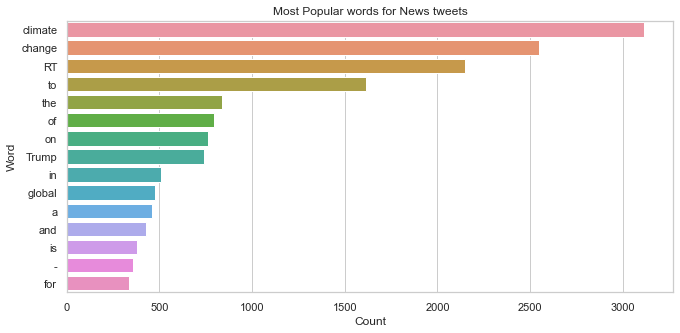

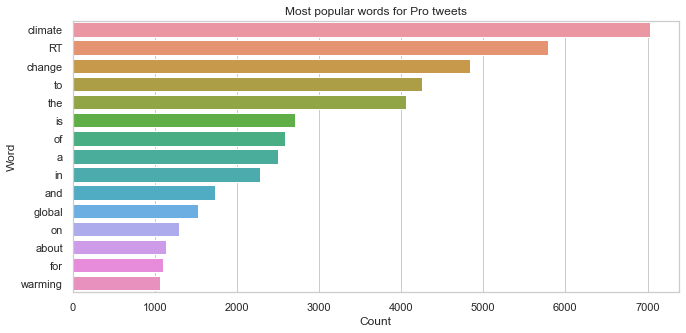

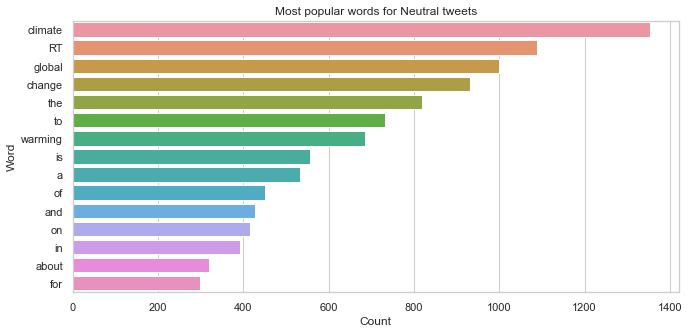

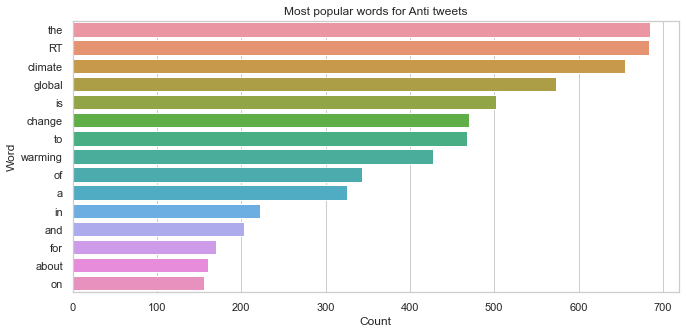

In [14]:
# Visualising each sentiment class according to the count of words
full_title = ['Most Popular words for News tweets',
              'Most popular words for Pro tweets',
              'Most popular words for Neutral tweets',
              'Most popular words for Anti tweets']

tweet_class = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(tweet_class):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

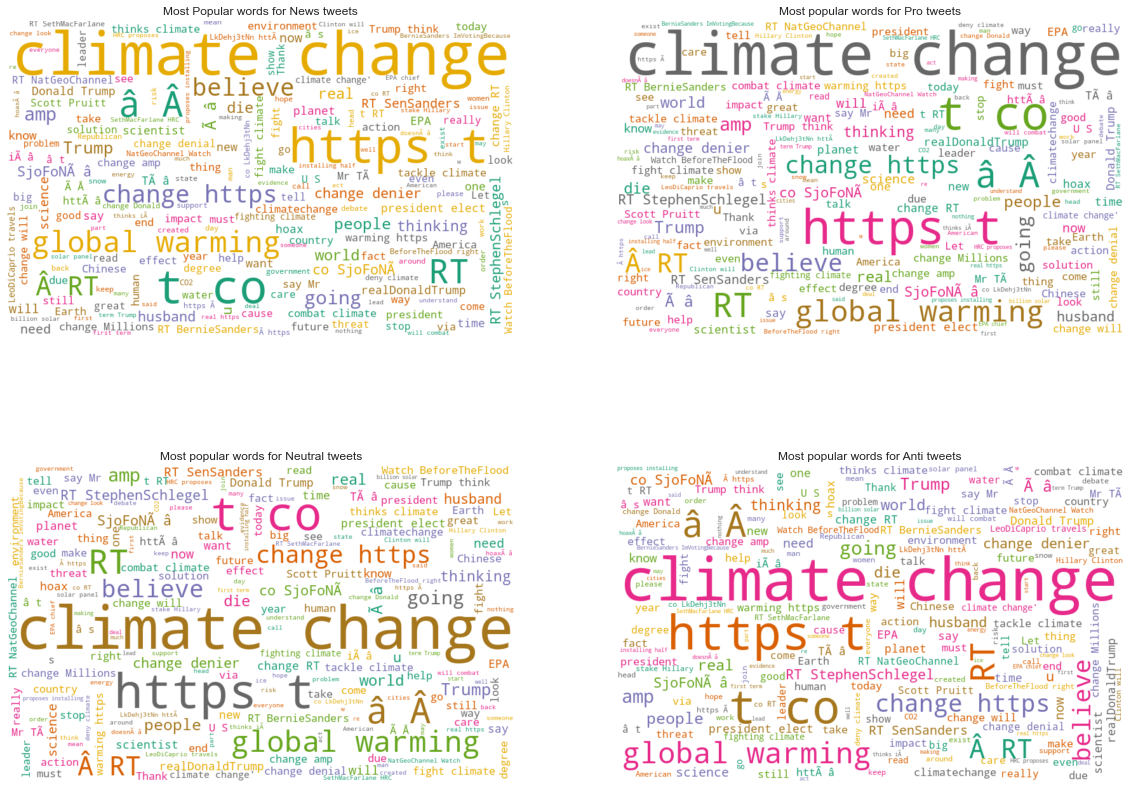

In [15]:
# Create word clouds of the most common words in each sentiment class
wc = WordCloud(width=800, height=500, 
               background_color='white', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_class)):
    wc.generate(tweet_class[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
    
plt.show()

- The most popular words in all 4 classes are Climate Change, Global Warming.

- There is some unnecessary data. The words http, https, website, co & RT are prominent, but will not assist us in our classification.


- Thee top 5 words in all classes are the same, except for the News class, in which the word 'Trump' features prominently.

## **Exploring the impact of Handles on the sentiment classes:**
A Twitter handle is the username that appears at the end of your unique Twitter URL. Twitter handles appear after the @ sign in your profile URL and it must be unique to your account. A Twitter name, on the other hand, is simply there to help people find the people or companies you're looking for.

In [16]:
# Creating a function to extract handles from tweets
def extract_handles(x):
    """ This function finds handles in a 
        tweet and returns them as a list"""
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

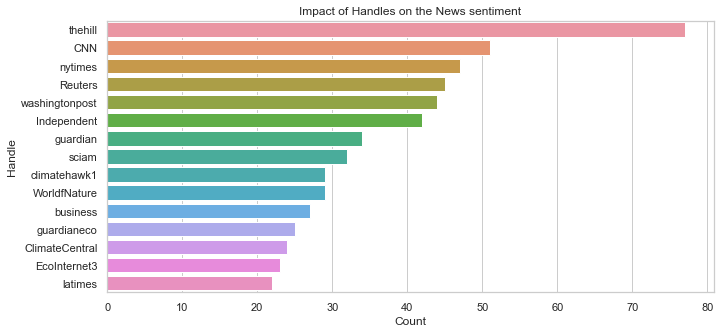

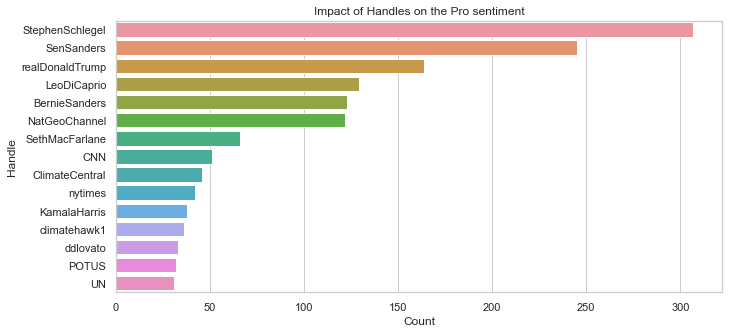

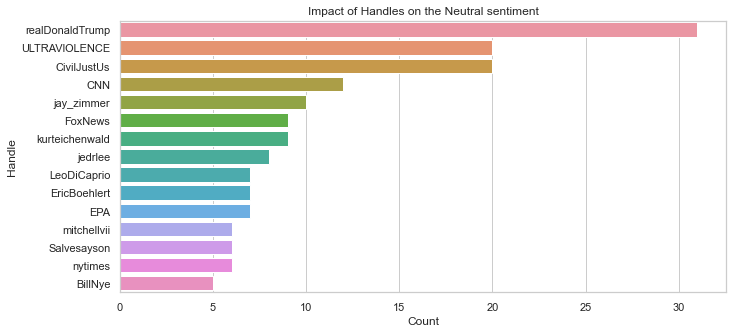

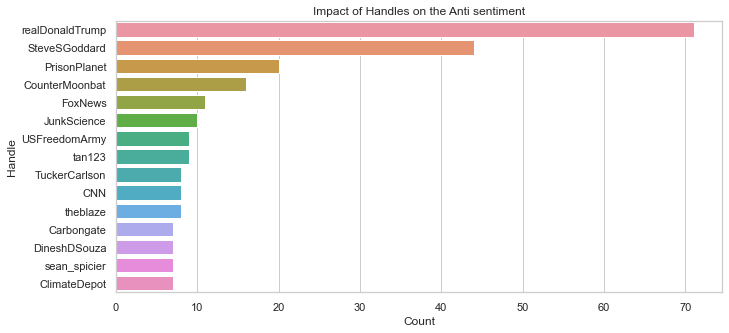

In [17]:
# Extracting handles from tweets
news_handles = extract_handles(train['message']
                              [train['sentiment'] == 2])
pro_handles = extract_handles(train['message']
                          [train['sentiment'] == 1])
neutral_handles = extract_handles(train['message']
                              [train['sentiment'] == 0])
anti_handles = extract_handles(train['message']
                          [train['sentiment'] == -1])

# Unnesting list
handles = [sum(news_handles, []), sum(pro_handles, []), sum(neutral_handles, []),
           sum(anti_handles, [])]

# Visualising the Handles
full_title = ['Impact of Handles on the News sentiment',
              'Impact of Handles on the Pro sentiment',
              'Impact of Handles on the Neutral sentiment',
              'Impact of Handles on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Handle', x='Count')
    plt.title(full_title[i])
    plt.show()

* The most popular News handles are actual news broadcaster accounts.

* The most popular Pro handles seem to be celebrity accounts & news accounts.

* Trump features most for most popular Anti & Neutral tweets. 

* Celebrities have been raising climate change as an issue to increase public awareness.

* Most popular trends handles are American, as most Twitter users reside in the United States of America, 64.2%. [Click here](http://statista.com/statistics/242606/number-of-active-twitter-users-in-selected-countries)


## **Exploring the impact of Hashtags on the sentiment classes:**
People use the hashtag symbol (#) before a relevant keyword or phrase in their Tweet to categorize those Tweets and help them show more easily in Twitter search. Clicking or tapping on a hashtagged word in any message shows you other Tweets that include that hashtag. Hashtags can be included anywhere in a Tweet.

In [18]:
# Creating a function to extract hashtags from tweets
def extract_hashtags(x):
    """ The following function finds hashtags on a 
        tweet and returns them as a list"""
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

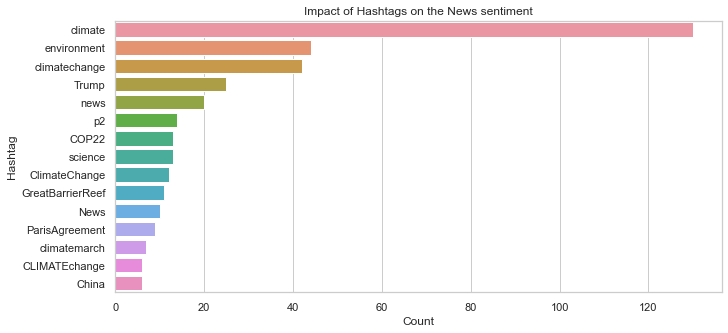

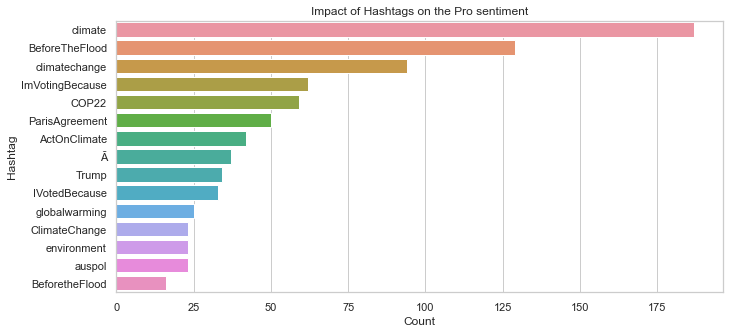

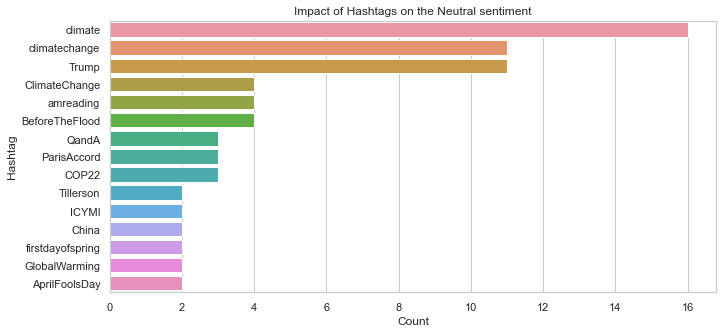

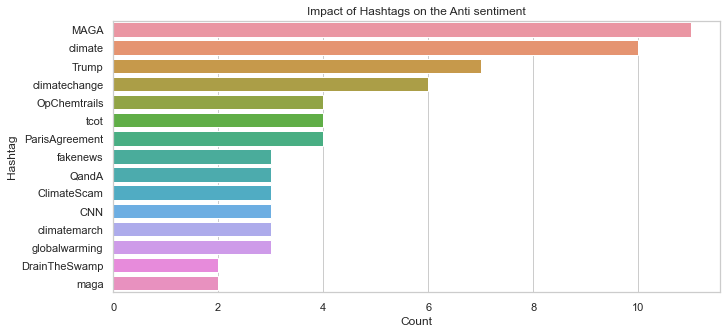

In [19]:
# Extracting hashtags from tweets
news_hashtags = extract_hashtags(train['message']
                              [train['sentiment'] == 2])
pro_hashtags = extract_hashtags(train['message']
                          [train['sentiment'] == 1])
neutral_hashtags = extract_hashtags(train['message']
                              [train['sentiment'] == 0])
anti_hashtags = extract_hashtags(train['message']
                          [train['sentiment'] == -1])

# Unnesting list
hashtags = [sum(news_hashtags, []), sum(pro_hashtags, []),
            sum(neutral_hashtags, []),sum(anti_hashtags, [])]

# Visualising the Hashtags
full_title = ['Impact of Hashtags on the News sentiment',
              'Impact of Hashtags on the Pro sentiment',
              'Impact of Hashtags on the Neutral sentiment',
              'Impact of Hashtags on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(hashtags):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Hashtag', x='Count')
    plt.title(full_title[i])
    plt.show()

* We can see that the top 5 hashtags are generally similar, although there seem to be words here that are irrelevant, eg. single letters like 'd', 'p' & words like 'maga' & 'tcot' 

In [20]:
# Function to extract hashtags - not based on Sentiment
def extract_hashtags(tweet):
    '''Provides a tweet and extract hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)",
                                        tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

In [21]:
# Creating a dataframe to store the hashtags & visualise them
hashtag_df = train.copy()
hashtag_df['tweet_hashtags'] = hashtag_df['message'].map(extract_hashtags)

In [22]:
# Now we will extract the hashtags to a list
all_hashtags = hashtag_df['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()

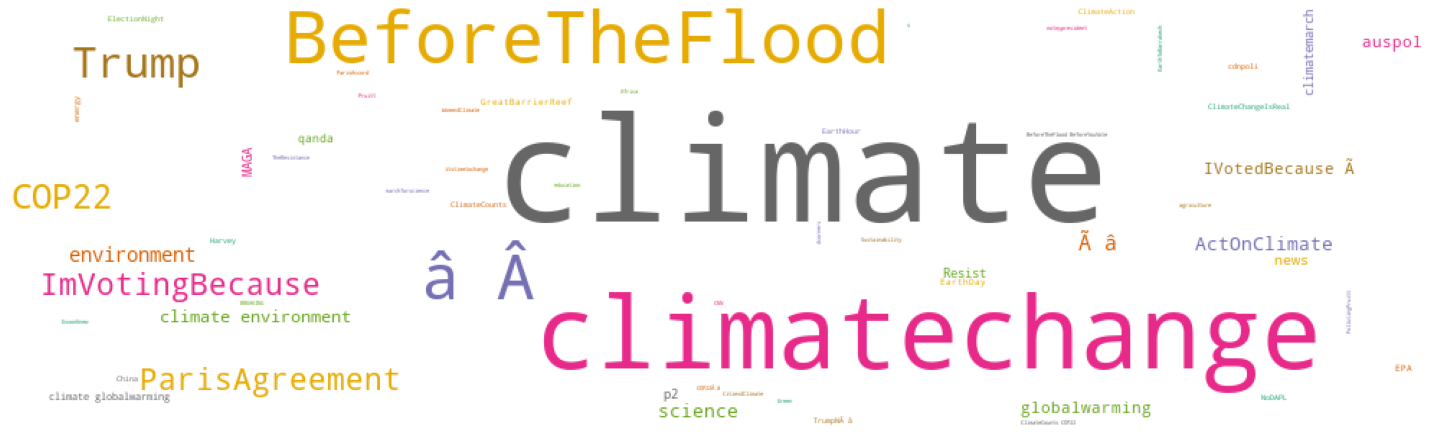

In [23]:
# Changing the series to an ndarray
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# Convert list to one string with all the words
hashes_words = " ".join(hashes)

# Generate the wordcloud. The max_words argument controls the number of words on the cloud
wordcloud = WordCloud(width=1000, height=300,relative_scaling=1.0
                      ,background_color='white', colormap='Dark2',
                      max_words=100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

* We can see the top hashtags more clearly now. 

* The top 3 hashtags are: 
    1. climate
    2. climatechange
    3. BeforeTheFlood

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|⚡ Description: Data engineering ⚡ |
|:--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase our datasets contains a non_numerical column certain preprocessing steps must be carried out, which involves:


#### Data processing
We will start by having a quick look on our data once more to have a better Memory of it, then we Begin with Data Processing.

- Letter casing: Converting all letters to either upper case or lower case.
- Tokenizing: Divides text into a sequence of tokens, which roughly correspond to "words" . Tokens are words separated by spaces in a text.
- Noise removal: Eliminating unwanted characters, such as HTML tags, punctuation marks, special characters, white spaces etc.
- Stopwords removal: Stop words are words which do not contain important significance to be used in Search Queries, They do not contribute much to the Machine learning Model. A list of stopwords can be defined by the nltk library, or it can be business-specific.
- Stemming: This  is the process of transforming to the root word by Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem. Porter Stemmer is the most widely used technique because it is very fast. Generally, stemming chops off end of the word, and mostly it works fine.
- Lemmatization: A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. The process of reducing the different forms of a word to one single form, Sometimes you will wind up with a very similar word, but other times you will wind up with a completely different word.
---

In [24]:
# Loading and displaying an overview of the data
print('Dimension of train is: ', train.shape)
print('Dimension of test is: ', test.shape)

Dimension of train is:  (15819, 3)
Dimension of test is:  (10546, 2)


1. There are 3 columns and 15819 rows for the Train Data.
2. There are 2 columns and 10546 for the Test Data.

In [25]:
#The first ten rows of the traing dataset
train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


We have two features and one label
features inludes:- message,
                 - tweetid
& - sentiment

In [26]:
def preprocess(text):
    """This function takes in pandas dataframe,
       removes URL hyperlinks, stopwords, punctuation noises,
       and lemmatize the text."""

    tokenizer = TreebankWordTokenizer() 
    lemmatizer = WordNetLemmatizer()
    stopwords_list = stopwords.words('english')
    point_noise = string.punctuation + '0123456789'
    
    processed_text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', "", text)
    processed_text = re.sub(r'@[a-zA-Z0-9\_\w]+', '', processed_text)
    processed_text = re.sub(r'#[a-zA-Z0-9]+', '', processed_text)
    processed_text = re.sub(r'RT', '', processed_text)
    processed_text = processed_text.lower()
    processed_text = re.sub(r'([https][http][htt][th][ht])', "",processed_text)
    processed_text = ''.join([word for word in processed_text if word not in point_noise])
    processed_text = "".join(word for word in processed_text if ord(word)<128)
    processed_text = tokenizer.tokenize(processed_text)
    processed_text = [lemmatizer.lemmatize(word) for word in processed_text if word not in stopwords_list]
    processed_text = [word for word in processed_text if len(word) >= 2]
    processed_text = ' '.join(processed_text)
   
    return processed_text

##### Deploying the Function to our Train and Test Data

In [27]:
train['message'] = train['message'].apply(preprocess)
test['message'] = test['message'].apply(preprocess)

We will be working with both Train and Test dataset in the Data Engineering phase.

We then Apply the preprocess function to both training and test dataset.

##### Data Vectorization: Vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors. Here we convert tokens to numbers. It is an important step because machine learning algorithm works well with numbers and not text.
- In this guide, we will implement vectorization using CountVector, which means breaking down a sentence or any text into words by performing preprocessing tasks like converting all words to lowercase, thus removing special characters. In NLP models can't understand textual data they only accept numbers, so this textual data needs to be vectorized or to convert text to numerical data.

- N-gram is one of the methods in language modeling where text documents can be divided into a combination of sequential words.

In [28]:
vector = CountVectorizer(lowercase=True, stop_words= 'english', min_df=1, ngram_range=(1, 2))

- Tunning the vector to include only tokens that appears more than 2 times, with an N_gram range of 20 words.
- We Now transform the text using the vector

edit

In [29]:
train_features = vector.fit_transform(train['message'])
test_features = vector.transform(test['message'])

In [30]:
print(train_features.shape, test_features.shape)

(15819, 74567) (10546, 74567)


- We now have 74567 features for use to train our model.

 ##### Countvectorizer is a method to convert text to numerical data.
- We later View the converted DataFrame using df.head()

In [31]:
vector_train = pd.DataFrame(train_features.todense(), columns=vector.get_feature_names_out())

In [32]:
vector_train.head(5)

,aaa,aaa science,aaaaaaaaaaa,aaaaaand,aaaaaand deleted,aaaaand,aaaaand trump,aaaand,aaaand eliminated,aaaand epa,...,zone global,zone guess,zone ronlieber,zone temperate,zoo,zoo hindsight,zum,zum merkel,zwizku,zwizku midzy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|⚡ Description: Modelling on predictions of Individual Beliefs on Climate Changes ⚡ |
|:--------------------------- |
|In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. In these we will train our model with both the Imbalanced dataset and Balanced dataset, so as to compare the results.

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model. Our data has already been vectorised in the Data Engineering Stage.

The following 5 models will be considered:

- Random Forest Classifier
- Naive Bayes CLassifier using MultinomialNB
- K nearest neighbors
- Logistic Regression
- Linear SVC

#### Train - Test - Split

Before anything we have to split our train data into features and target variables. Split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

---

In [33]:
# Split the dataset into train (80%) & validation (20%) for model training

X = train_features #Independent Variables also known as Features
y = train['sentiment'] #Dependent Variable also known as Target

# Split the train data to create validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the models

The models are trained by passing the train data through each Model. The trained models are then used to predict the classes for the validation/Test data set.

In [34]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
names = ['Random Forest'
         ,"Naive Bayes"
         ,'Nearest Neighbors'
         ,'Logistic Regression'
         ,'Linear SVC'
        ]

In [35]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
classifiers = [
    RandomForestClassifier()
    ,MultinomialNB(alpha=1)
    ,KNeighborsClassifier(n_neighbors=10)
    ,LogisticRegression()
    ,LinearSVC(C=10, class_weight=None)
]

In [36]:
# Training of models, scoring & appending to results list
results = []

# Creating dictionaries to store evaluation results
models = {}
confusion = {}
class_report = {}

# This will calculate the total training time of each model
for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

# This will show us the status of the training
    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

# This will show us the status of the scoring
    print ('... scoring')
    
# These are our evaluation measures
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='macro')
    recall    = metrics.recall_score(y_train, y_pred, average='macro')

    f1        = metrics.f1_score(y_train, y_pred, average='macro')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='macro')

# Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision,
                    recall, f1, f1_test, run_time.best])

# Creating a dataframe of the results to view easily
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy',
                                         'Precision', 'Recall', 'F1 Train',
                                         'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Random Forest model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Logistic Regression model...
... predicting
... scoring
Fitting Linear SVC model...
... predicting
... scoring


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

## Model evaluation

The performance of each model will be evaluated based on the precision, accuracy and F1 score achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:

Classification report
Confusion matrix
The best model will be selected based on the weighted F1 score.

In [37]:
# Viewing the results in a dataframe
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.989016,0.991737,0.983012,0.987304,0.644278,4.683032
Linear SVC,0.993915,0.993064,0.993323,0.993187,0.621753,2.684233
Random Forest,0.994311,0.994134,0.993403,0.993761,0.587249,107.043313
Naive Bayes,0.901462,0.939398,0.827324,0.870974,0.580145,0.010409
Nearest Neighbors,0.427341,0.637175,0.429811,0.371999,0.290786,0.001539


<AxesSubplot:xlabel='Classifier'>

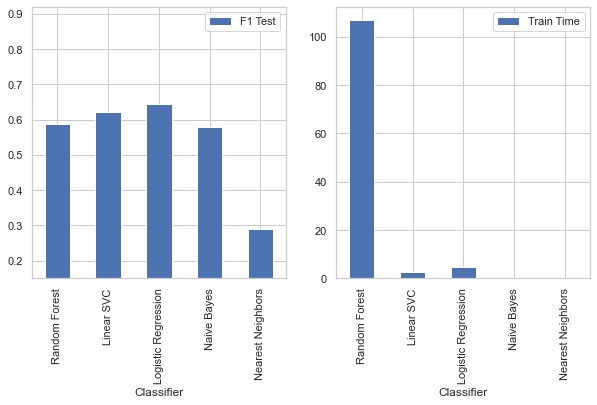

In [38]:
# Viewing the results on a bar chart
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0],
             xlim=[0,1.1], ylim=[0.15,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])


* The Random Forest took the longest to train but didn't perform well on the F1 test.

* All other models were trained relatively fast in comparison to the Random Forest.

* From the results table & bar chart, we can see the models that perform best are the Logistic Regression & Linear Support Vector Machines(SVM). We will now try & improve on these two models. 

In [119]:
# Random forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# Naive Bayes
mnb = MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)

# K - nearest neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Linear SVC
svc = LinearSVC(C=10, class_weight=None)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

              precision    recall  f1-score   support

          -1       0.76      0.42      0.55       278
           0       0.58      0.44      0.50       425
           1       0.76      0.87      0.81      1755
           2       0.74      0.70      0.72       706

    accuracy                           0.74      3164
   macro avg       0.71      0.61      0.64      3164
weighted avg       0.73      0.74      0.73      3164



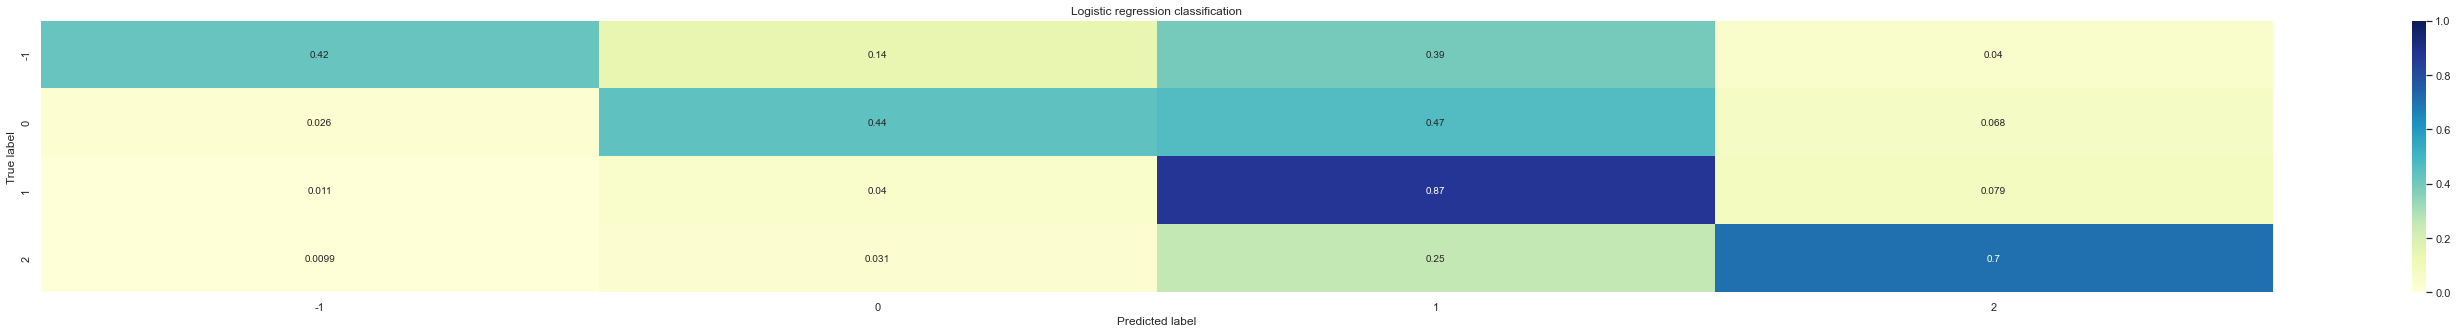

In [40]:
# Generate a classification Report for the Logistic Regression model

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(metrics.classification_report(y_test, lr_pred))

cm = confusion_matrix(y_test, lr_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lr.classes_, 
            yticklabels=lr.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Logistic regression classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
param_dict = {
    'C':[250,200,150,100]
}

gridL = GridSearchCV(models['Logistic Regression'], param_grid=param_dict, cv=3, n_jobs=1)
gridL.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [250, 200, 150, 100]})

In [42]:
import pickle

model_save_path = "Linear_regression.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lr,file)

## Tuning the chosen models

#### To improve our models, we will use Cross-validation & Grid Search methods

* Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.


* Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Grid-Search will build a model on each parameter combination possible.



In [43]:
# Setting the number of folds

kfold = StratifiedKFold( n_splits = 150)

## Logistic Regression Model

In [44]:
# Logistic Regression model
lr = LogisticRegression(class_weight='balanced')
'''The balanced class weight automatically balances data based on the label frequency'''

#Set the parameters according to the first run output (C = 0.09)
lr2_param = {
    'multi_class':[('ovr')],
    'penalty':['l2'],
    'dual':[False],
    'C':[5]   
    }

# Grid Search on the Logistic Regression model
lr_CV = GridSearchCV(lr, param_grid=[lr2_param],
                     cv=kfold, n_jobs=-1, verbose=1)

#  Fitting the model to our data
lr_CV.fit(X, y)

# Print the best parameters
print(lr_CV.best_params_)

# Find the best estimator
logi_best = lr_CV.best_estimator_

# Print the best score
print(lr_CV.best_score_)

Fitting 150 folds for each of 1 candidates, totalling 150 fits
{'C': 5, 'dual': False, 'multi_class': 'ovr', 'penalty': 'l2'}
0.7238831985624438


In [45]:
# Building Logistic Regression model with best parameters
lg_reg = LogisticRegression(class_weight='balanced', multi_class=('ovr'), 
                            penalty='l2', dual=False, C=5)

# Training the model on the whole training dataset
lg_reg.fit(X, y)

LogisticRegression(C=5, class_weight='balanced', multi_class='ovr')

In [46]:
# create the ensemble model
estimators = {('logistic', lg_reg)}
ensemble = VotingClassifier(estimators)
ensemble.fit(X, y)

# Checking model perfomance
print('accuracy: {}'.format(metrics.accuracy_score(y_train, y_pred)))
print('precision: {}'.format(metrics.precision_score(y_train, y_pred, average='macro')))
print('recall: {}'.format(metrics.recall_score(y_train, y_pred, average='macro')))
print('f1_score: {}'.format(metrics.f1_score(y_train, y_pred, average='macro')))

accuracy: 0.9939154484393521
precision: 0.993064177016677
recall: 0.993322974640133
f1_score: 0.9931865808218923


In [120]:
#Saving each metric for Random Forest to add to a dictionary for logging
f1 = f1_score(y_test, rfc_pred, average='macro')
precision = precision_score(y_test, rfc_pred, average='macro')
recall = recall_score(y_test, rfc_pred, average='macro')

In [121]:
#Create dictionaries for the data we want to log
params_rfc = {"random_state": 42,
          "model_type": "rfc",  
          "vectorizer": "CountVectorizer",
          "imbalanced": "smote",
          "stratify": True
          }
metrics_rfc = {"f1": f1,
           "recall": recall,
           "precision": precision
           }


In [122]:
#Log our parameters and results
experiment.log_parameters(params_rfc)
experiment.log_metrics(metrics_rfc)

In [123]:
#Saving each metric for Naive Bayes to add to a dictionary for logging
f1 = f1_score(y_test, mnb_pred, average='macro')
precision = precision_score(y_test, mnb_pred, average='macro')
recall = recall_score(y_test, mnb_pred, average='macro')

In [124]:
#Create dictionaries for the data we want to log
params_mnb = {"random_state": 42,
          "model_type": "nmb",
          "vectorizer": "CountVectorizer",
          "imbalanced": "smote",
          "Alpha" : 1,
          "stratify": True
          }
metrics_mnb = {"f1": f1,
           "recall": recall,
           "precision": precision
           }


In [125]:
#Log our parameters and results
experiment.log_parameters(params_mnb)
experiment.log_metrics(metrics_mnb)

In [126]:
#Saving each metric for K-Neighbors to add to a dictionary for logging
f1 = f1_score(y_test, knn_pred, average='macro')
precision = precision_score(y_test, knn_pred, average='macro')
recall = recall_score(y_test, knn_pred, average='macro')

In [127]:
#Create dictionaries for the data we want to log
params_knn = {"random_state": 42,
          "model_type": "knn",
          "vectorizer": "CountVectorizer",
          "imbalanced": "smote",
          "n_neighbors": 10,
          "stratify": True
          }
metrics_knn = {"f1": f1,
           "recall": recall,
           "precision": precision
           }


In [128]:
#Log our parameters and results
experiment.log_parameters(params_knn)
experiment.log_metrics(metrics_knn)

In [129]:
#Saving each metric for Logistic Regression to add to a dictionary for logging
f1 = f1_score(y_test, lr_pred, average='macro')
precision = precision_score(y_test, lr_pred, average='macro')
recall = recall_score(y_test, lr_pred, average='macro')

In [130]:
#Create dictionaries for the data we want to log
params_lr = {"random_state": 42,
          "model_type": "logreg",
          "vectorizer": "CountVectorizer",
          "imbalanced": "smote",
          "param_grid": str(param_dict),
          "stratify": True
          }
metrics_lr = {"f1": f1,
           "recall": recall,
           "precision": precision
           }


In [131]:
#Log our parameters and results
experiment.log_parameters(params_lr)
experiment.log_metrics(metrics_lr)

In [132]:
#Saving each metric for Linear SVC to add to a dictionary for logging
f1 = f1_score(y_test, svc_pred, average='macro')
precision = precision_score(y_test, svc_pred, average='macro')
recall = recall_score(y_test, svc_pred, average='macro')

In [133]:
#Create dictionaries for the data we want to log
params_svc = {"random_state": 42,
          "model_type": "svc",
          "c" : 10,
          "vectorizer": "CountVectorizer",
          "imbalanced": "smote",
          "class_weight" : None,
          "stratify": True
          }
metrics_svc = {"f1": f1,
           "recall": recall,
           "precision": precision
           }


In [134]:
#Log our parameters and results
experiment.log_parameters(params_svc)
experiment.log_metrics(metrics_svc)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description Or Model Findings ⚡ |
| :--------------------------- |
| After applying the trained Machine Learning Models on the test data, we found the Logistic Regression model to be the overall best performing model among all other models trained. Some models like the `SVC`, `RamdomForest` and the `MultinomialNB Model` were  implemented,and were also found to have good performance.

The Logistic Regression model came out with the highest `F1_score` 

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

###  Conclusion

We went through multiple stages of data cleaning and feature engineering to improve the data, train a Machine Learning Model and arrive at a model with a good performance to better predict unseen data coming from the outside world.

- we also applied resampling technique to labels but it did not improve the model performance.
- we further tuned our model using Cross-validation & Grid Search methods to improve them

We noticed that the model with the best performance came from the unbalanced label set. Balancing the labels had little or no effect on the model's performance.

---

## Submission
We create a kaggle submission file in a csv format on our test data using the chosen model which is Logistic Regression Model

In [95]:
# Making predictions on the test data set
submission_lr = lr.predict(test_features)

# Appending the prediction results to the test set, in a new column called 'sentiment'
output = pd.DataFrame( data = {'tweetid': test['tweetid'],
                               'sentiment': submission_lr })

# Creating a csv file
output.to_csv('submission_lr.csv', index = False, quoting = 3)

In [135]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/andy-sumo/js6-predict/616fddbf31ad496991bc84940d10b866
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     f1 [5]        : (0.29078550206537385, 0.6442777141326038)
COMET INFO:     precision [5] : (0.6271214940401533, 0.7100385675792155)
COMET INFO:     recall [5]    : (0.3694042161576649, 0.6104985747983978)
COMET INFO:   Parameters:
COMET INFO:     Alpha                    : 1
COMET INFO:     C                        : 10
COMET INFO:     algorithm                : auto
COMET INFO:     alpha                    : 1
COMET INFO:     bootstrap                : True
COMET INFO:     c                        : 10
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     class_prior              : 1
COMET INFO:     class_weight             : 1

In [136]:
experiment.display()

## REFERENCES

### Notebook

* https://athena.explore-datascience.net/
* https://github.com/gravesa333/Classifying_Climate_Change_Tweets/blob/master/.ipynb_checkpoints/Project_04_Classifier_R1-checkpoint.ipynb
* https://github.com/cherry247/Data-Science
* https://www.w3schools.com/
* https://www.youtube.com/watch?v=xtTyEoJ31Vg

### STREAMLIT APP

* https://awesome-streamlit.org/
* https://www.analyticsvidhya.com/blog/2022/02/interactive-tweet-sentiment-visualization/
* https://discuss.streamlit.io/t/streamlit-option-menu-is-a-simple-streamlit-component-that-allows-users-to-select-a-single-item-from-a-list-of-options-in-a-menu/20514
* https://lottiefiles.com/79697-health-analysis-loading-animation
